# Generalized Linkwitz-Riley Crossover

According to https://www.native-instruments.com/fileadmin/ni_media/downloads/pdf/VAFilterDesign_2.1.0.pdf

Chapter "EMQF Linkwitz–Riley crossovers"

Some Links:
- https://jupyterbook.org/en/stable/content/math.html

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy import signal

In [2]:
from filterdesign import emqf
from filterdesign import filterplot

In [3]:
order = 5
stopband_attenuation = 25 #dB
w = np.linspace(10**-1, 10**1, 100000)

$$
  	H_1(s) = \underbrace{\frac{P_1(s)}{P(s)}}_{G_1(s)} \cdot \frac{P_1(-s)}{P(s)} = G_1^2(s)
$$
$$
  	H_2(s) = \underbrace{\frac{P_2(s)}{P(s)}}_{G_2(s)} \cdot \frac{P_2(-s)}{P(s)} = (-1)^N G_2^2(s)
$$
$$
  	H_{AP}(s) = H_1(s) + H_2(s) = \frac{P(-s)}{P(s)} = G_1^2(s) + (-1)^N G_2^2(s)
$$
where $G_1(s) = \frac{P_1(s)}{P(s)}$ is an EMQF lowpass filter of order $N$ and $G_2(s) = \frac{P_2(s)}{P(s)}$ is the corresponding highpass filter according to the lowpass-to-highpass transformation $G_2(s) = G_1(1/s)$

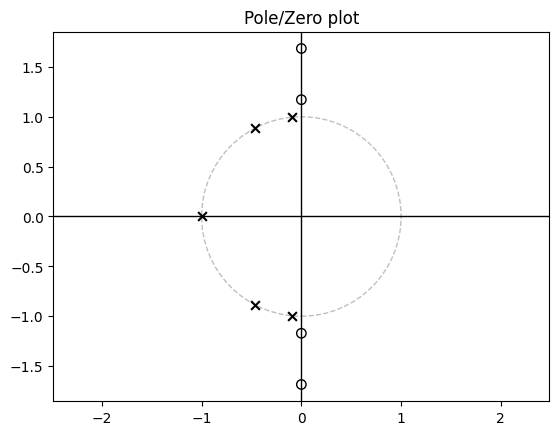

In [4]:
G_1 = emqf.emqfap(order, stopband_attenuation, f3db=True)
filterplot.pole_zero_plot(G_1, unitcircle=True)

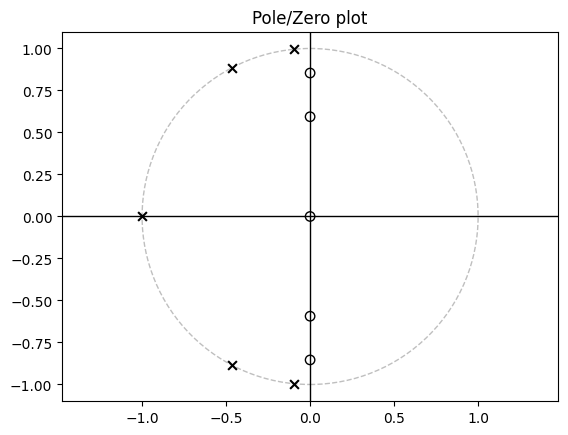

In [5]:
G_2 = signal.lp2hp_zpk(G_1[0], G_1[1], G_1[2], wo=1.0) # at w_0 is the -3dB frequency
filterplot.pole_zero_plot(G_2, unitcircle=True)

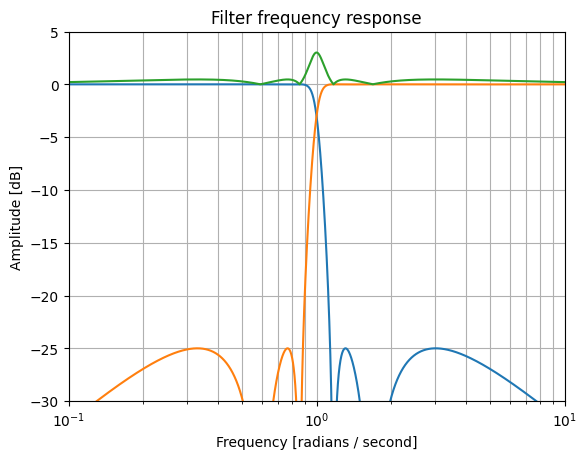

In [6]:
z, p , k = G_1
b, a = signal.zpk2tf(z, p, k)
_, g1 = signal.freqs(b, a, worN=w)
plt.semilogx(w, 20 * np.log10(abs(g1)))

z, p , k = G_2
b, a = signal.zpk2tf(z, p, k)
_, g2 = signal.freqs(b, a, worN=w)
plt.semilogx(w, 20 * np.log10(abs(g2)))

plt.semilogx(w, 20 * np.log10(abs(g1)+abs(g2)))

plt.title("Filter frequency response")
plt.xlabel("Frequency [radians / second]")
plt.ylabel("Amplitude [dB]")
plt.margins(0, 0.1)
plt.ylim(-30,5)
plt.grid(which="both", axis="both")
# plt.axvline(100, color='green') # cutoff frequency
plt.show()

We observe that this filter pair is not magnitude complementary.

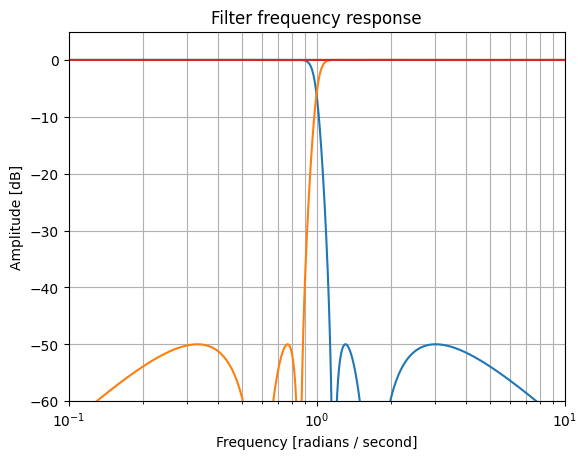

In [7]:
z, p , k = G_1
b, a = signal.zpk2tf(z, p, k)
_, g1 = signal.freqs(b, a, worN=w)
h1 = g1*g1
plt.semilogx(w, 20 * np.log10(abs(h1)))

z, p , k = G_2
b, a = signal.zpk2tf(z, p, k)
_, g2 = signal.freqs(b, a, worN=w)
h2 = (-1)**int(order) * g2*g2
plt.semilogx(w, 20 * np.log10(abs(h2)))

plt.semilogx(w, 20 * np.log10(abs(h1)+abs(h2))) # magnitude complementary
plt.semilogx(w, 20 * np.log10(abs(h1+h2))) # allpass complementary

plt.title("Filter frequency response")
plt.xlabel("Frequency [radians / second]")
plt.ylabel("Amplitude [dB]")
plt.margins(0, 0.1)
plt.ylim(-60,5)
plt.grid(which="both", axis="both")
# plt.axvline(100, color='green') # cutoff frequency
# plt.ylim(-30,5)
plt.show()

We can observe the magnitude complementary property.